In [1]:
pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arkhipovg","key":"baec1adbb1a3280cb61ba10aeeaa9bb0"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d milanvaddoriya/data-science-job-salary

  0% 0.00/9.97k [00:00<?, ?B/s]
100% 9.97k/9.97k [00:00<00:00, 18.8MB/s]


In [5]:
!unzip data-science-job-salary.zip

Archive:  data-science-job-salary.zip
  inflating: datascience_salaries.csv  


In [6]:
import pandas as pd
df = pd.read_csv('datascience_salaries.csv')

In [7]:
df

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary
0,0,Data scientist,Full Time,Senior,New York City,USD,149000
1,2,Data scientist,Full Time,Senior,Boston,USD,120000
2,3,Data scientist,Full Time,Senior,London,USD,68000
3,4,Data scientist,Full Time,Senior,Boston,USD,120000
4,5,Data scientist,Full Time,Senior,New York City,USD,149000
...,...,...,...,...,...,...,...
1166,2243,ML Ops,Full Time,Senior,Toronto,USD,228000
1167,2249,ML Ops,Full Time,Senior,Boston,USD,115000
1168,2250,ML Ops,Full Time,Senior,Delhi,USD,76000
1169,2255,ML Ops,Full Time,Senior,San Francisco,USD,68000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1171 non-null   int64 
 1   job_title         1171 non-null   object
 2   job_type          1171 non-null   object
 3   experience_level  1171 non-null   object
 4   location          1171 non-null   object
 5   salary_currency   1171 non-null   object
 6   salary            1171 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 64.2+ KB


In [9]:
df.isnull().sum() # No missing values!

Unnamed: 0          0
job_title           0
job_type            0
experience_level    0
location            0
salary_currency     0
salary              0
dtype: int64

In [10]:
df.duplicated().sum() # No duplicates values!

0

In [14]:
df['experience_level'] = pd.Categorical(df['experience_level'], categories=['Entry', 'Mid', 'Senior', 'Executive'], ordered=True)

In [15]:
df.groupby('experience_level').describe()

Unnamed: 0                                                \
                      count         mean         std   min     25%    50%   
experience_level                                                            
Entry                 126.0   854.452381  597.840803  12.0  377.25  759.0   
Mid                   305.0   911.895082  619.550040  26.0  360.00  809.0   
Senior                727.0   949.806052  666.186352   0.0  363.50  829.0   
Executive              13.0  1125.384615  663.497493  32.0  646.00  865.0   

                                  salary                                       \
                      75%     max  count          mean           std      min   
experience_level                                                                
Entry             1142.75  2225.0  126.0  36111.111111  16151.394849  30000.0   
Mid               1488.00  2206.0  305.0  51786.885246  20609.874641  30000.0   
Senior            1535.00  2259.0  727.0  75088.033012  33560.733276  30000.0   
Executive         1846.00  2004.0   13.0  76076.923077  46860.540505  41000.0   

                                                        
                      25%      50%       75%       max  
experience_level                                        
Entry             30000.0  30000.0   36000.0  140000.0  
Mid               40000.0  51000.0   51000.0  160000.0  
Senior            63000.0  68000.0   69000.0  228000.0  
Executive         43000.0  46000.0  110000.0  175000.0

In [33]:
grouped_data = df.groupby('experience_level')['salary'].agg(['mean', 'median'])

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Entry'),
  Text(1, 0, 'Mid'),
  Text(2, 0, 'Senior'),
  Text(3, 0, 'Executive')])

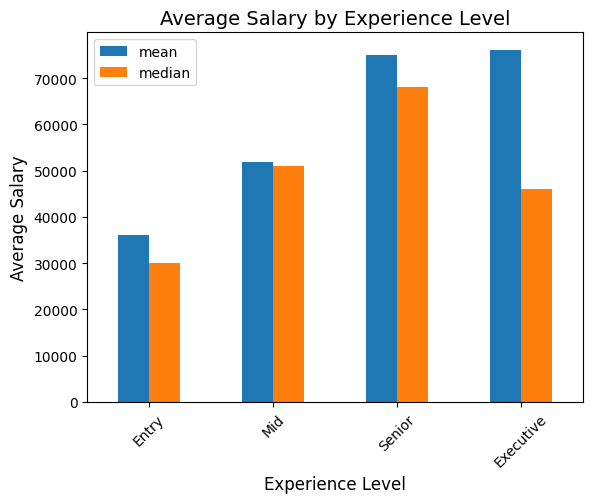

In [34]:
# @title Salary by Experience Level
import matplotlib.pyplot as plt
grouped_data.plot(kind='bar')
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Average Salary', fontsize=12)
plt.title('Average Salary by Experience Level', fontsize=14)
plt.xticks(rotation=45)